[TOC]

源代码可以到[Github](https://github.com/rougier/numpy-tutorial)找到。

所有代码和材料使用[创造性-相同方式共享-署名4.0](http://creativecommons.org/licenses/by-sa/4.0)证书。

本教程首发于http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html

阅读作者更多文章：
[Matplotlib教程](http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html)
[Numpy 100 练](http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html)

## 介绍

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- → a powerful N-dimensional array object
- → sophisticated (broadcasting) functions
- → tools for integrating C/C++ and Fortran code
- → useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined and this allows NumPy to seamlessly and speedily integrate with a wide variety of projects. We are going to explore numpy through a simple example, implementing the Game of Life.

## 生命游戏

Numpy is slanted toward scientific computing and we'll consider in this section the game of life by John Conway which is one of the earliest example of cellular automata (see figure below). Those cellular automaton can be conveniently considered as array of cells that are connected together through the notion of neighbours. We'll show in the following sections implementation of this game using pure python and numpy in order to illustrate main differences with python and numpy.

![Figure 1 Simulation of the game of life.](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/game-of-life.png)

The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is the best-known example of a cellular automaton. The "game" is actually a zero-player game, meaning that its evolution is determined by its initial state, needing no input from human players. One interacts with the Game of Life by creating an initial configuration and observing how it evolves.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

Any live cell with fewer than two live neighbours dies, as if by needs caused by underpopulation.
Any live cell with more than three live neighbours dies, as if by overcrowding.
Any live cell with two or three live neighbours lives, unchanged, to the next generation.
Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern constitutes the 'seed' of the system. The first generation is created by applying the above rules simultaneously to every cell in the seed – births and deaths happen simultaneously, and the discrete moment at which this happens is sometimes called a tick. (In other words, each generation is a pure function of the one before.) The rules continue to be applied repeatedly to create further generations.

We'll first use a very simple setup and more precisely, we'll use the glider pattern that is known to move one step diagonally in 4 iterations as illustrated below:


![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-00.png)
t = 0

![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-01.png)
t = 1

![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-02.png)
t = 2

![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-03.png)
t = 3

![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-04.png)
t = 4

This property will help us debug our scripts.

## Python方式

In pure python, we can code the Game of Life using a list of lists representing the board where cells are supposed to evolve:

```python
>>> Z =  [[0,0,0,0,0,0],
       [0,0,1,1,0,0],
       [0,1,0,1,0,0],
       [0,0,0,1,0,0],
       [0,0,0,0,0,0],
       [0,0,0,0,0,0]]
```

In [37]:
Z = [[0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,1,1,0,0],
    [0,1,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,0,0]]

This board possesses a 0 border that allows to accelerate things a bit by avoiding to have specific tests for borders when counting the number of neighbours. First step is to count neighbours:

In [30]:
def compute_neighbor(Z):
    """(对边界进行0填充)每次计算当前细胞周围细胞的状态(数)来确定当前细胞的下一个状态"""
    shape = len(Z), len(Z[0])
    N = [[0,]*(shape[1]) for i in range(shape[0])]
    for x in range(1,shape[0]-1):
        for y in range(1, shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
            + Z[x-1][y]+ Z[x+1][y] \
            + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [31]:
compute_neighbor(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 0, 0, 0, 0, 0]]

To iterate one step in time, we then simply count the number of neighbours for each internal cell and we update the whole board according to the 4 rules:

In [32]:
def iterate(Z):
    N = compute_neighbor(Z)
    shape = len(N), len(N[0])
    for x in range(1, shape[0]-1):
        for y in range(1, shape[1]-1):
            if Z[x][y]==1 and (N[x][y]<2 or N[x][y] >3):
                Z[x][y] = 0
            elif Z[x][y]==0 and N[x][y]==3:
                Z[x][y] = 1
    return Z

In [33]:
iterate(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [34]:
def show(Z):
    for l in Z[1:-1]:
        print(l[1:-1])
    print()

In [35]:
show(Z)

[0, 0, 0, 0]
[0, 1, 1, 0]
[0, 0, 1, 1]
[0, 1, 0, 0]



In [36]:
for i in range(4):
    show(iterate(Z))

[0, 0, 0, 0]
[0, 1, 1, 1]
[0, 0, 0, 1]
[0, 0, 1, 0]

[0, 0, 1, 0]
[0, 0, 1, 1]
[0, 1, 0, 1]
[0, 0, 0, 0]

[0, 0, 1, 1]
[0, 1, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 0]

[0, 0, 1, 1]
[0, 0, 0, 1]
[0, 0, 1, 0]
[0, 0, 0, 0]



## Numpy的方式

The first thing to do is to create the proper numpy array to hold the cells. This can be done very easily with:

In [93]:
import numpy as np

Z = np.array([[0,0,0,0,0,0],
            [0,0,0,0,0,0],
            [0,0,1,1,0,0],
            [0,1,0,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,0,0,0]])

Note that we did not specify the data type of the array and thus, numpy will choose one for us. Since all elements are integers, numpy will then choose an integer data type. This can be easily checked using:

In [39]:
print(Z.dtype)

int32


We can also check the shape of the array to make sure it is 6x6:

In [40]:
print(Z.shape)

(6, 6)


Each element of Z can be accessed using a row and a column index (in that order):

In [41]:
print(Z[0,5])

0


But even better, we can also access a subpart of the array using the slice notation:

In [42]:
print(Z[1:5, 1:5])

[[0 0 0 0]
 [0 1 1 0]
 [1 0 1 0]
 [0 0 1 0]]


In the example above, we actually extract a subpart of Z ranging from rows 1 to 5 and columns 1 to 5. It is important to understand at this point that this is really a subpart of Z in the sense that any change to this subpart will have immediate impact on Z:

In [43]:
A = Z[1:5, 1:5]
A[0, 0] = 9

In [44]:
print(Z)

[[0 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 1 1 0 0]
 [0 1 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]


We set the value of A[0,0] to 9 and we see immediate change in Z[1,1] because A[0,0] actually corresponds to Z[1,1]. This may seem trivial with such simple arrays, but things can become much more complex (we'll see that later). If in doubt, you can check easily if an array is part of another one:

In [45]:
print(Z.base is None)

True


In [46]:
print(A.base is Z)

True


### 数邻居

We now need a function to count the neighbours. We could do it the same way as for the python version, but this would make things very slow because of the nested loops. We would prefer to act on the whole array whenever possible, this is called vectorization.

Ok, let's start then...

First, you need to know that you can manipulate Z as if (and only as if) it was a regular scalar:

In [47]:
print(1+Z*2+3)

[[ 4  4  4  4  4  4]
 [ 4 22  4  4  4  4]
 [ 4  4  6  6  4  4]
 [ 4  6  4  6  4  4]
 [ 4  4  4  6  4  4]
 [ 4  4  4  4  4  4]]


If you look carefully at the output, you may realize that the ouptut corresponds to the formula above applied individually to each element. Said differently, we have (1+(2*Z+3))[i,j] == (1+(2*Z[i,j]+3)) for any i,j.

Ok, so far, so good. Now what happens if we add Z with one of its subpart, let's say Z[-1:1,-1:1] ?

In [48]:
 Z + Z[-1:1,-1:1]

ValueError: operands could not be broadcast together with shapes (6,6) (0,0) 

This raises a Value Error, but more interestingly, numpy complains about the impossibility of broadcasting the two arrays together. Broadcasting is a very powerful feature of numpy and most of the time, it saves you a lot of hassle. Let's consider for example the following code:

In [49]:
print(Z+1)

[[ 1  1  1  1  1  1]
 [ 1 10  1  1  1  1]
 [ 1  1  2  2  1  1]
 [ 1  2  1  2  1  1]
 [ 1  1  1  2  1  1]
 [ 1  1  1  1  1  1]]


How can a matrix and a scalar be added together ? Well, they can't. But numpy is smart enough to guess that you actually want to add 1 to each of the element of Z. This concept of broadcasting is quite powerful and it will take you some time before masterizing it fully (if even possible).

However, in the present case (counting neighbours if you remember), we won't use broadcasting (uh ?). But we'll use vectorize computation using the following code:

In [55]:
def count_neighbors(Z):
    N = np.zeros(Z.shape, dtype=int)
    N[1:-1, 1:-1] +=(Z[:-2, :-2] + Z[:-2,1:-1] + Z[:-2,2:] \
    + Z[1:-1,:-2] + Z[1:-1, 2:] \
    + Z[2:,:-2] + Z[2:, 1:-1] + Z[2:, 2:])
    
    return N

In [56]:
count_neighbors(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 2, 2, 1, 0],
       [0, 2, 3, 2, 2, 0],
       [0, 1, 5, 3, 3, 0],
       [0, 1, 3, 1, 2, 0],
       [0, 0, 0, 0, 0, 0]])

To understand this code, have a look at the figure below:

| | | |
| ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ |
| ![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/neighbours-1.png) | ![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/neighbours-2.png) | ![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/neighbours-3.png) |
| ![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/neighbours-4.png) | ![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/neighbours-5.png) | ![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/neighbours-6.png) |
| ![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/neighbours-7.png) | ![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/neighbours-8.png) | ![](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/neighbours-9.png) |



What we actually did with the above code is to add all the darker blue squares together. Since they have been chosen carefully, the result will be exactly what we expected. If you want to convince yourself, consider a cell in the lighter blue area of the central sub-figure and check what will the result for a given cell.

### 迭代

In a first approach, we can write the iterate function using the argwhere method that will give us the indices where a given condition is True.

In [66]:
T = count_neighbors(Z)
print(T)
T.ravel()[0]=9
print(T)

[[0 0 0 0 0 0]
 [0 1 2 2 1 0]
 [0 1 2 3 3 0]
 [0 2 4 4 2 0]
 [0 1 1 3 2 0]
 [0 0 0 0 0 0]]
[[9 0 0 0 0 0]
 [0 1 2 2 1 0]
 [0 1 2 3 3 0]
 [0 2 4 4 2 0]
 [0 1 1 3 2 0]
 [0 0 0 0 0 0]]


In [63]:
def iterate_game(Z):
    """迭代生命游戏：简单版本"""
    # 数邻居
    N = count_neighbors(Z)
    
    N_ = N.ravel()
    Z_ = Z.ravel()
    
    # 应用规则
    R1 = np.argwhere((Z_==1)&(N_<2)) # 孤独致死
    R2 = np.argwhere((Z_==1)&(N_>3)) # 拥挤致死
    R3 = np.argwhere((Z_==1)&(N_==2)|(N_==3)) # 保持活力
    R4 = np.argwhere((Z_==0)&(N_==3)) # 新细胞诞生
    
    # 设置新值
    Z_[R1] = 0
    Z_[R2] = 0
    Z_[R3] = Z_[R3]
    Z_[R4] = 1
    
    # 确保边界仍然为空
    Z[0,:] = Z[-1,:] = Z[:,0] = Z[:, -1] =0
    return Z
    

In [64]:
iterate_game(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

Even if this first version does not use nested loops, it is far from optimal because of the use of the 4 argwhere calls that may be quite slow. We can instead take advantages of numpy features the following way.

In [90]:
def itertate_game2(Z):
    #print(Z)
    # 数邻居
    N = count_neighbors(Z)
    #print("count\n",N)
    # 应用规则
    
    birth = (N==3)&(Z[:,:]==0)
    survive = ((N==2)|(N==3)) &(Z[:,:]==1)
    #print("birth\n", birth)
    #print("survive\n", survive)
    Z[...] = 0
    Z[:,:][birth|survive] = 1
    #print("Result\n", Z)
    return Z

In [89]:
T2=itertate_game2(Z)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 1 1 0]
 [0 1 0 0 1 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]]
count
 [[0 0 0 0 0 0]
 [0 1 2 3 2 0]
 [0 2 2 3 2 0]
 [0 2 5 7 4 0]
 [0 2 2 3 2 0]
 [0 0 0 0 0 0]]
birth
 [[False False False False False False]
 [False False False  True False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]
survive
 [[False False False False False False]
 [False False False False False False]
 [False False  True  True  True False]
 [False  True False False False False]
 [False False  True  True  True False]
 [False False False False False False]]
Result
 [[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 1 1 0]
 [0 1 0 0 0 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]]


In [86]:
T2

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [87]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [95]:
for i in range(5):
    itertate_game2(Z)
    print("time=",i, "\n",Z)

time= 0 
 [[0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
time= 1 
 [[0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
time= 2 
 [[0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
time= 3 
 [[0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
time= 4 
 [[0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


### 更大的游戏场

While numpy works perfectly with very small arrays, you'll really benefit from numpy power with big to very big arrays. So let us reconsider the game of life with a bigger array. First, we won't initalize the array by hand but initalize it randomly:

In [96]:
Z = np.random.randint(0,2,(256,512))

and we simply iterate as previously:

In [97]:
for i in range(100):
    itertate_game2(Z)
print(Z)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


and display result:

In [99]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [102]:

def display(Z):
    size=np.array(Z.shape)
    dpi = 72.0
    figsize=size[1]/float(dpi), size[0]/float(dpi)
    fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
    fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
    plt.imshow(Z, interpolation='nearest', cmap=plt.cm.gray_r)
    plt.xticks([]),plt.yticks([])
    plt.show()

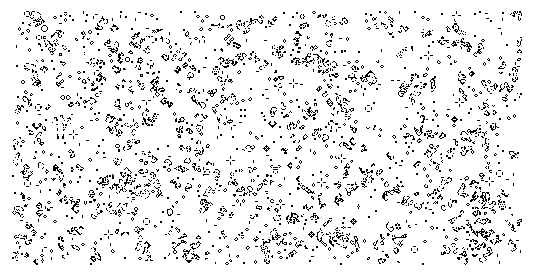

In [103]:
display(Z)

Easy enough, no ?

### 更进一步

In [ ]:

Z = np.random.randint(0, 2, (256, 512))

plt.ion()
size=np.array(Z.shape)
dpi = 120.0
figsize=size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False) # 去掉边框
for i in range(250):
    itertate_game2(Z)
    plt.cla()
    plt.xticks([]), plt.yticks([])
    # display(Z)
    plt.imshow(Z, cmap=plt.cm.gray_r)
    plt.pause(0.1)

plt.ioff()
plt.show()
